#### Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis.

In [1]:
import pandas as pd
import numpy as np 
import statistics as st

In [2]:
# Load the data
df = pd.read_csv("diabetes.csv")
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
# mean
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [4]:
# Median
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [5]:
# Mode
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [6]:
# Standard division
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [7]:
# Variance
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [8]:
# Interquartile Range 
from scipy.stats import iqr
iqr(df['Age'])

17.0

In [9]:
# skewness 
print(df.skew())

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


In [10]:
# Bivariante analysis: Linear and logistic regression modeling
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='whitegrid', context='notebook') 
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

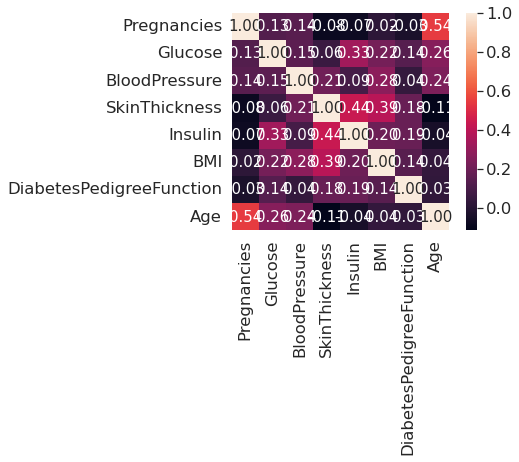

In [12]:
import numpy as np
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

(1, 768)

In [104]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = {}
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            print(errors)
            print(X.T.shape)
            self.w_[1:] = self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)
    
X = df[["Age"]].values
y = df[["Pregnancies"]].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

lr = LinearRegressionGD() 
lr.fit(X_std, y_std) 
plt.plot(range(1, lr.n_iter+1), lr.cost_) 
plt.ylabel('SSE') 
plt.xlabel('Epoch') 
plt.show()

[[ 0.63994726  0.63994726  0.63994726 ...  0.63994726  0.63994726
   0.63994726]
 [-0.84488505 -0.84488505 -0.84488505 ... -0.84488505 -0.84488505
  -0.84488505]
 [ 1.23388019  1.23388019  1.23388019 ...  1.23388019  1.23388019
   1.23388019]
 ...
 [ 0.3429808   0.3429808   0.3429808  ...  0.3429808   0.3429808
   0.3429808 ]
 [-0.84488505 -0.84488505 -0.84488505 ... -0.84488505 -0.84488505
  -0.84488505]
 [-0.84488505 -0.84488505 -0.84488505 ... -0.84488505 -0.84488505
  -0.84488505]]
(1, 768)


ValueError: could not broadcast input array from shape (768,) into shape (1,)

In [21]:
y_std.shape

(768, 1)

-5.3290705182009533e-17
-5.3290705182009533e-17
-5.3290705182009533e-17


ValueError: x and y must have same first dimension, but have shapes (768, 1) and (1,)

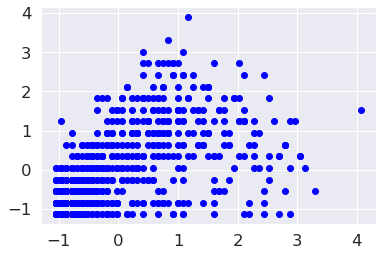

In [27]:
def lin_regplot(X, y, model): 
    plt.scatter(X, y, c='blue')
    print(model.predict(X))
    plt.plot(X, model.predict(X), color='red') 
    return None 
lin_regplot(X_std, y_std, lr) 
plt.xlabel('Age (standardized)') 
plt.ylabel('Pregnancies(standardized)') 
plt.show()

In [152]:
age_std = sc_x.transform([[20]]) 
pregnancy_std = lr.predict(age_std)
print("Pregnancy: %.3f" %sc_y.inverse_transform(price_std)) 
print('Slope: %.3f' % lr.w_[1])

ValueError: shapes (1,) and (768,) not aligned: 1 (dim 0) != 768 (dim 0)

In [149]:
age_std

NameError: name 'age_std' is not defined

In [153]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [101]:
from sklearn.linear_model import SGDClassifier
lr = SGDClassifier(eta0=0.001, max_iter=20, verbose=1)
lr.fit(X, y)

-- Epoch 1
Norm: 237.69, NNZs: 1, Bias: 136.370233, T: 768, Avg. loss: 916.973533
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 19.72, NNZs: 1, Bias: 250.182946, T: 1536, Avg. loss: 600.452155
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 69.63, NNZs: 1, Bias: 307.808338, T: 2304, Avg. loss: 415.451344
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 73.69, NNZs: 1, Bias: 340.081115, T: 3072, Avg. loss: 309.769696
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 68.20, NNZs: 1, Bias: 386.072500, T: 3840, Avg. loss: 271.090698
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 57.07, NNZs: 1, Bias: 410.732471, T: 4608, Avg. loss: 234.457905
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 25.10, NNZs: 1, Bias: 432.753190, T: 5376, Avg. loss: 197.554174
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 35.00, NNZs: 1, Bias: 450.538780, T: 6144, Avg. loss: 154.260394
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 51.83, NNZs: 1, Bias: 467.937046, T: 6912, Avg.

/home/djoe/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished
/home/djoe/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(eta0=0.001, max_iter=20, verbose=1)

ValueError: x and y must have same first dimension, but have shapes (20,) and (17,)

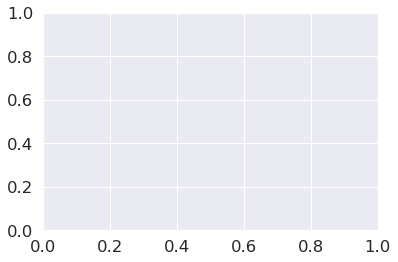

In [71]:
plt.plot(range(1, lr.n_iter_+1), lr.classes_)

In [102]:
lr.loss

'hinge'

In [99]:
range(1, lr.n_iter_+1)

range(1, 21)

In [117]:

def mean_squared_error(y_true, y_predicted):

    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost


def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
                     stopping_threshold = 1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))

    costs = []
    weights = []
    previous_cost = None

    for i in range(iterations):

        y_predicted = (current_weight * x) + current_bias
        current_cost = mean_squared_error(y, y_predicted)
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break

        previous_cost = current_cost

        costs.append(current_cost)
        weights.append(current_weight)

        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)


    plt.figure(figsize = (8,6))
    plt.plot(weights, costs)
    plt.scatter(weights, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()


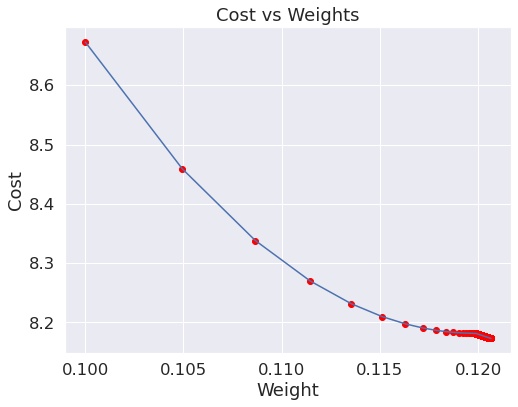

In [118]:
gradient_descent(X, y)

In [125]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=99)
train_x.shape, train_y.shape 
from sklearn.linear_model import LinearRegression 
le = LinearRegression() 
le.fit(train_x,train_y) 
y_pred = le.predict(test_x)
y_pred 


array([[ 8.23314974],
       [ 2.47679238],
       [ 2.6323696 ],
       [ 2.32121515],
       [ 2.6323696 ],
       [ 4.96602799],
       [ 2.32121515],
       [ 1.85448347],
       [ 2.47679238],
       [ 5.12160522],
       [ 4.65487354],
       [ 2.6323696 ],
       [ 2.47679238],
       [ 8.85545864],
       [ 5.89949135],
       [ 2.0100607 ],
       [ 1.85448347],
       [ 3.09910128],
       [ 2.6323696 ],
       [ 4.34371909],
       [ 4.18814186],
       [ 4.96602799],
       [ 2.0100607 ],
       [ 3.41025573],
       [ 3.72141019],
       [ 1.85448347],
       [ 4.34371909],
       [ 2.16563793],
       [ 3.72141019],
       [ 7.92199529],
       [ 3.09910128],
       [ 2.0100607 ],
       [ 2.16563793],
       [ 3.41025573],
       [ 1.85448347],
       [ 6.52180025],
       [ 4.81045077],
       [ 1.85448347],
       [ 3.56583296],
       [ 2.0100607 ],
       [ 5.74391412],
       [ 2.78794683],
       [ 3.25467851],
       [ 2.0100607 ],
       [ 1.85448347],
       [ 2

In [128]:
result = pd.DataFrame({'Actual': test_y.reshape(-1), 'Predict' : y_pred.reshape(-1)}) 
result

,Actual,Predict
0,0,8.233150
1,4,2.476792
2,4,2.632370
3,3,2.321215
4,3,2.632370
...,...,...
226,12,6.055069
227,3,6.677377
228,9,5.588337
229,8,9.166613


In [129]:
print ('coefficient', le.coef_) 
print('intercept', le.intercept_)

coefficient [[0.15557723]]
intercept [-1.41263827]


In [135]:
!pip install datacompy
# * off and sleep. Need to parse the two dataframes to 
# 1-old diabets data 
# 2- predicted diabets data (new) :>
import datacompy 
compare = datacompy.Compare(df1,df2,join_columns='acct_id', abs_tol=0.0001, 
rel_tol=0,df1_name='olddiabetes',df2_name='newdiabetes') 
print(compare.report())

NameError: name 'df1' is not defined